# ML courses 5 & 6 - Practice on logistic regression and classification assessment

### <span style="color:red"> WRITE YOUR NAME HERE: </span>  SENA NUR BILGIN

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Data preparation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


**Loading the data set from Scikit-Learn**

In [3]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**   
Sklearn returns the dataset in the form of a dictionary. The actual dataset is stored under 'data', but there are other keys that give access to more information.

In [3]:
print(data_all.keys())
#Lets see the all the modules: 


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [5]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [7]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [8]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding. You will have to re-encode the variable a different way later.**

In [9]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Your Mission
We have here a large dataset that could help predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of features that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 6 (classification assessment).</font>

## We check at first if the tumor radius is a good predictor for breast cancer. 
Starting here, you must use the data contained in the variables `features` and `target` as they were defined in the previous cells.
###   1. Perform data exploration on the variable _mean radius_, to compare the distribution of its values between benign and malignant tumors.  

In [10]:
#Split the data:
df_combined = pd.concat([features, target], axis=1)
X = df_combined.drop(["tumor type"], axis=1)
y = df_combined[['tumor type']]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.25, random_state = 42)



               min    max       mean  median
tumor type                                  
benign       7.691  17.85  12.187929  12.240
malignant   10.950  28.11  17.404367  17.325


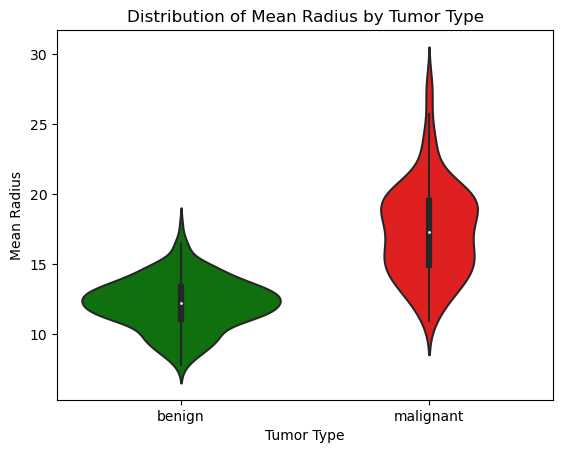

In [11]:

# Define palette colors for the violin plot
palette_colors = {"benign": "green", "malignant": "red"}

# Concatenate DataFrames along columns
df_combined_training = pd.concat([X_train, y_train], axis=1)
# Compute statistics for mean radius grouped by tumor type
group_by_radius = df_combined_training.groupby("tumor type")["mean radius"].agg([np.min, np.max, np.mean, np.median])
print(group_by_radius)

# Create a violin plot showing the distribution of mean radius for each tumor type
sns.violinplot(x="tumor type", y="mean radius", data=df_combined_training, palette=palette_colors)
# Add title and labels
plt.title('Distribution of Mean Radius by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Mean Radius')
# Display the plot
plt.show()


📝 Do you think _mean radius_ can make an good predictor of tumor type? Why? 

 Mean radius is indeed a significant feature in predicting tumor type, as malignant tumors typically have larger mean radius compared to benign tumors. Therefore, I think, it could be good predictor of tumor type.

### 2. Encode the target variable _tumor type_ and make sure you use the following encoding:
* 0 as 'benign'
* 1 as 'malignant'  
Since we are interested in the malignant tumors, we choose to encode them as 1.

In [12]:


# Define encoding dictionary
encoding_dict = {'benign': 0, 'malignant': 1}
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
# Transform the test labels
y_test_encoded = label_encoder.transform(y_test.values.ravel())
# Check the classes that were encoded
print("Encoded classes:", label_encoder.classes_)
# Check if the encoding is consistent with the encoding dictionary
if all(label_encoder.transform(list(encoding_dict.keys())) == list(encoding_dict.values())):
    print("Encoding is consistent with the provided encoding dictionary.")
else:
    print("Encoding is not consistent with the provided encoding dictionary.")

# Create DataFrames for the encoded training and testing labels
y_train_encoded_df = pd.DataFrame(data=y_train_encoded, columns=['tumor type'])
y_test_encoded_df = pd.DataFrame(data=y_test_encoded, columns=['tumor type'])




Encoded classes: ['benign' 'malignant']
Encoding is consistent with the provided encoding dictionary.


In [13]:
print(y_test_encoded_df)

     tumor type
0             0
1             1
2             1
3             0
4             0
..          ...
138           0
139           1
140           0
141           1
142           0

[143 rows x 1 columns]


### 3. Plot the target variable with respect to mean radius (scatter plot).  

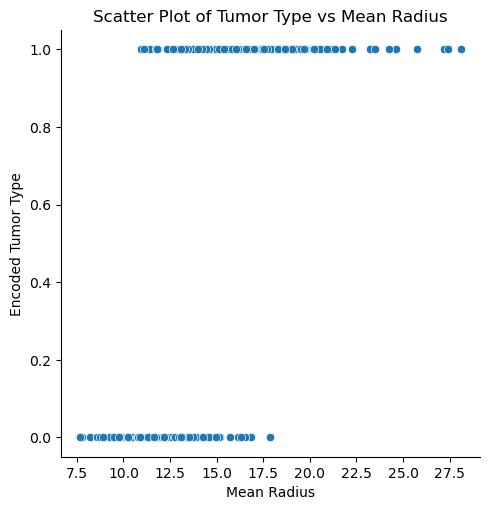

In [14]:

df_combined_training['tumor type'] = y_train_encoded
# Plot the scatter plot
sns.relplot(y='tumor type', x="mean radius",
            data=df_combined_training,
            kind="scatter")

# Add title and labels
plt.title('Scatter Plot of Tumor Type vs Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Encoded Tumor Type')

# Show the plot
plt.show()


In [15]:
df_combined_training.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.022600,0.011710,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915,0
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,1
402,12.960,18.29,84.18,525.2,0.07351,0.07899,0.040570,0.018830,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247,0
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.169800,0.082930,0.1713,0.05916,...,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075,1
210,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.164000,0.095610,0.1765,0.05024,...,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865,1
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.053750,0.032630,0.1727,0.06317,...,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772,1
442,13.780,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,...,17.50,97.90,706.6,0.10720,0.10710,0.03517,0.03312,0.1859,0.06810,0
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.052530,0.033340,0.1616,0.05684,...,31.69,117.70,1030.0,0.13890,0.20570,0.27120,0.15300,0.2675,0.07873,1
404,12.340,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974,0
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


📝 Do you think a logistic regression model can model the relationship between the two variables reasonably well?  
Why or why not?

Yes, a logistic regression model can reasonably model the relationship between the two variables, mean radius and tumor type. The scatter plot shows a clear separation between the two tumor types based on the mean radius. The logistic function can effectively capture this relationship by fitting a sigmoid curve to the data points, allowing for accurate prediction of tumor type (benign or malignant) based on mean radius.

### 4. Train a logistic regression model using only mean radius as a feature.


In [16]:

X_train_mean_radius = pd.DataFrame(data=X_train['mean radius'], columns=['mean radius'])
X_test_mean_radius = pd.DataFrame(data=X_test['mean radius'], columns=['mean radius'])

log_reg_model_mean_radius = LogisticRegression()
log_reg_model_mean_radius.fit(X_train_mean_radius, y_train_encoded)

y_pred_mean_radius = log_reg_model_mean_radius.predict(X_test_mean_radius)

accuracy_radius = accuracy_score(y_test_encoded, y_pred_mean_radius)
print("Accuracy of the logistic regression model using only mean radius as a feature:", accuracy_radius)



Accuracy of the logistic regression model using only mean radius as a feature: 0.9090909090909091


### 5. Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of _mean radius,_ according to your logistic regression model. 
More formally, the curve should represent the following probability:  
        $P\left( Y=1 \left| X=x \right. \right)$ _where $Y$ is the tumor type and $x$ is the mean radius._

Here is a piece of code that will display the probability curve of your model. Modify it so the scatter plot of the data appear on the same plot as the probability curve:

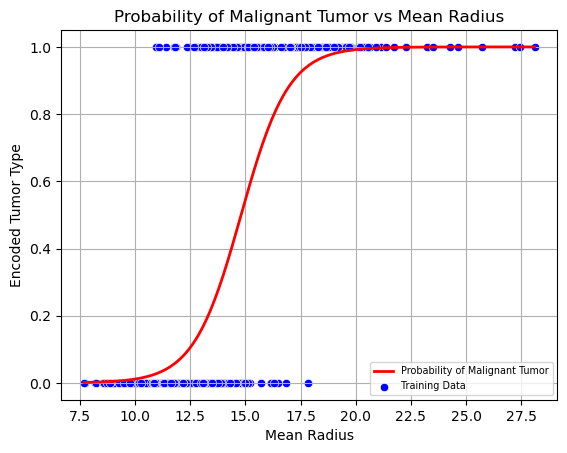

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Complete this line
logistic_regression = log_reg_model_mean_radius ## This variable should point to your trained model

####
# Don't touch the rest of this cell
X_curve = np.arange(np.min(X_train_mean_radius.to_numpy()), np.max(X_train_mean_radius.to_numpy()), 0.1).reshape(-1, 1)
y_proba = logistic_regression.predict_proba(X_curve) ## Get the corresponding probability predictions
y_proba_class1 = y_proba[:,1]  ## Isolate the probability for the positive class (P(Y=1))

# Plot the probability curve with a smooth line
plt.plot(X_curve, y_proba_class1, c='red', linestyle='-', linewidth=2, label='Probability of Malignant Tumor')

# Plot the scatter plot of training data with markers
sns.scatterplot(x=X_train_mean_radius['mean radius'], y=y_train_encoded, color='blue', marker='o', label='Training Data')

# Add legend for both curves with adjusted size and position
plt.legend(loc='lower right', fontsize='x-small')

# Add title and labels
plt.title('Probability of Malignant Tumor vs Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Encoded Tumor Type')

# Show grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


###  6. According to your model, what is the minimum _mean radius_ value for considering that the tumor is malignant?  
  Make a few predictions with your model with different values of _mean radius_ to check your intuition. 

In [18]:
threshold = 0.5

for mean_radius in np.arange(np.min(X_train_mean_radius), np.max(X_train_mean_radius), 0.1):
    probability_malignant = log_reg_model_mean_radius.predict_proba([[mean_radius]])[:, 1][0]
    if probability_malignant >= threshold:
        print(f"Minimum mean radius for predicting malignancy: {mean_radius}")
        break


Minimum mean radius for predicting malignancy: 14.890999999999973


### <font color=red>7. Compute the performance metrics for your model.</font> 

a) Compute and display the confusion matrix.

Confusion Matrix:
[[85  4]
 [ 9 45]]


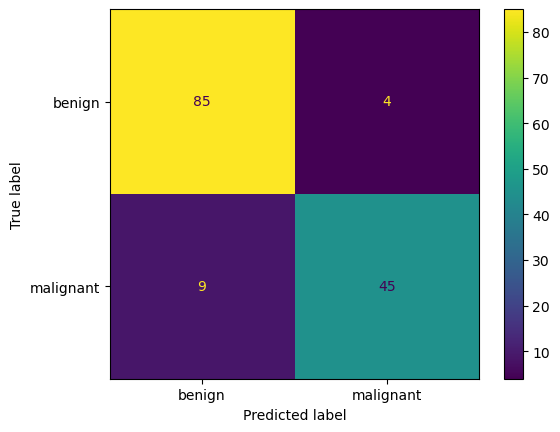

In [19]:




conf_matrix = confusion_matrix(y_test_encoded, y_pred_mean_radius)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["benign", "malignant"])
ax = disp.plot()

print("Confusion Matrix:")
print(conf_matrix)


b) Compute the accuracy, precision and recall "by hand" using the values that appear in the confusion matrix. 


In [20]:
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print("Accuracy:", accuracy)
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print("Recall:", recall)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
print("Precision:", precision)



Accuracy: 0.9090909090909091
Recall: 0.8333333333333334
Precision: 0.9183673469387755


c) Compute the f1-score

In [21]:


f1 = f1_score(y_test_encoded, y_pred_mean_radius)
print("F1-score:", f1)

F1-score: 0.8737864077669903


d) 📝 Comment your results. What can you say about your model's performance?

- 1) Accuracy: The model correctly classifies tumors as malignant or benign approximately 91% of the time.
- 2) Recall: Around 83% of the malignant tumors present in the dataset are correctly identified by the model.
- 3) Precision: Out of all the tumors predicted as malignant by the model, approximately 92% are actually malignant.
- 4) F1-score: A balanced assessment of the model's performance, accounting for both false positives and false negatives, yielding a value of 0.874.


Overall, these results suggest that the model performs well in distinguishing between malignant and benign tumors, with a good balance between precision and recall.

### <font color=red>8. Imagine that you are developing this algorithm for an oncologist.

a) 📝 Should you focus on maximizing the recall or the precision of the prediction? Why? 

!! Focus on Recall: In the context of developing an algorithm for an oncologist, prioritizing recall is crucial. This ensures that malignant tumors are not missed, even if it means accepting a higher rate of false positives.



b) 📝 Are there questions that you might need to ask the oncologist in order to decide what metric to use? 

 - 3 important question:
 1) The consequences of false negatives versus false positives, 
 2) Their tolerance for each type of error
 3) How they typically prioritize sensitivity and specificity in clinical practice.

c) 📝 Now that you have fitted your model to the dataset, you can still make an adjustment on your model to maximize the metric that you have chosen and reduce the type of error that the oncologist is most afraid of.
What adjustment can you make on your model's predictions?

Adjustments for Maximizing Recall is the most important step, therefore to maximize recall and reduce the risk of missing malignant tumors, we might lower the classification threshold. This ensures that the model is more sensitive in identifying malignant tumors, even it actually increasing false positives. We might deal with the unnecessary stress but not actual cancer :)

### <font color=red>9. Tweak your model's prediction the way you proposed in your answer of question 8. </font>
    Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. 

Accuracy with Lowered Threshold: 0.8531468531468531
Precision with Lowered Threshold: 0.7538461538461538
Recall with Lowered Threshold: 0.9074074074074074
F1-score with Lowered Threshold: 0.8235294117647058


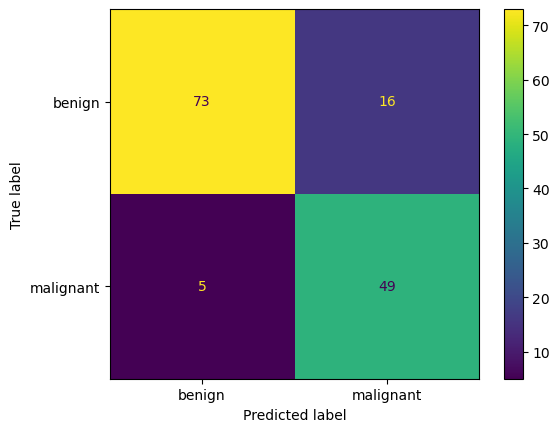

In [22]:
y_pred_prob_lower_threshold = (log_reg_model_mean_radius.predict_proba(X_test_mean_radius)[:, 1] >= 0.3).astype(int)
conf_matrix_lower_threshold = confusion_matrix(y_test_encoded, y_pred_prob_lower_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lower_threshold, display_labels=["benign", "malignant"])
ax = disp.plot()

# Compute accuracy, precision, recall, and F1-score
accuracy_lower_threshold = (conf_matrix_lower_threshold[0, 0] + conf_matrix_lower_threshold[1, 1]) / np.sum(conf_matrix_lower_threshold)
precision_lower_threshold = conf_matrix_lower_threshold[1, 1] / (conf_matrix_lower_threshold[1, 1] + conf_matrix_lower_threshold[0, 1])
recall_lower_threshold = conf_matrix_lower_threshold[1, 1] / (conf_matrix_lower_threshold[1, 1] + conf_matrix_lower_threshold[1, 0])
f1_score_lower_threshold = 2 * (precision_lower_threshold * recall_lower_threshold) / (precision_lower_threshold + recall_lower_threshold)

# Display performance metrics
print("Accuracy with Lowered Threshold:", accuracy_lower_threshold)
print("Precision with Lowered Threshold:", precision_lower_threshold)
print("Recall with Lowered Threshold:", recall_lower_threshold)
print("F1-score with Lowered Threshold:", f1_score_lower_threshold)


📝 Comment your results.

Confusion Matrix:
1) True Positives (TP) increased from 45 to 49, indicating more correct identification of malignant tumors.
2) False Positives (FP) increased from 4 to 16, indicating more benign tumors were incorrectly classified as malignant.
3) True Negatives (TN) decreased from 85 to 73, indicating fewer correct classifications of benign tumors.
4) False Negatives (FN) decreased from 9 to 5, indicating fewer missed malignant tumors.

Measures:
- Accuracy decreased slightly from 0.9091 to 0.8531 due to more false positives.
- Precision decreased from 0.9184 to 0.7538, showing more incorrect positive predictions.
- Recall increased from 0.8333 to 0.9074, indicating better capture of malignant cases.
- F1-score decreased slightly from 0.8738 to 0.8235, reflecting the trade-off between precision and recall.


Overall, lowering the threshold increased the model's sensitivity (recall) at the expense of its specificity (precision), resulting in a higher number of true positives but also more false positives

## We decide to add an extra feature to our model.
### 10. Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant feature to choose (in addition to mean radius).

📝 Which predictor do you choose? Explain why.

In [23]:

correlation_matrix = df_combined_training[['mean texture', 'mean perimeter', 'mean area', 'tumor type']].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')



,mean texture,mean perimeter,mean area,tumor type
mean texture,1.000000,0.311127,0.298170,0.417589
mean perimeter,0.311127,1.000000,0.986012,0.726986
mean area,0.298170,0.986012,1.000000,0.690171
tumor type,0.417589,0.726986,0.690171,1.000000


In [24]:
highest_correlation = correlation_matrix['tumor type'].abs().nlargest(2).index[1]
print("Variable with the highest correlation:", highest_correlation)

Variable with the highest correlation: mean perimeter


### 11. Re-train your logistic regression with your two features (mean radius and the one you have picked).

In [25]:
X_train_mean_radius_perimeter= pd.DataFrame(data=X_train[['mean radius', 'mean perimeter']], columns=['mean radius', 'mean perimeter'])
X_test_mean_radius_perimeter = pd.DataFrame(data=X_test[['mean radius', 'mean perimeter']], columns=['mean radius', 'mean perimeter'])

log_reg_model_mean_radius_perimeter = LogisticRegression()
log_reg_model_mean_radius_perimeter.fit(X_train_mean_radius_perimeter, y_train_encoded)

y_pred_mean_radius_perimeter = log_reg_model_mean_radius_perimeter.predict(X_test_mean_radius_perimeter)

accuracy_radius = accuracy_score(y_test_encoded, y_pred_mean_radius_perimeter)
print("Accuracy of the logistic regression model using only mean radius as a feature:", accuracy_radius)




Accuracy of the logistic regression model using only mean radius as a feature: 0.9300699300699301


### <font color=red>12. Calculate the performance of your model with two features.</font>


Accuracy: 0.9090909090909091
Precision: 0.9183673469387755
Recall: 0.8333333333333334
F1-score: 0.8737864077669903


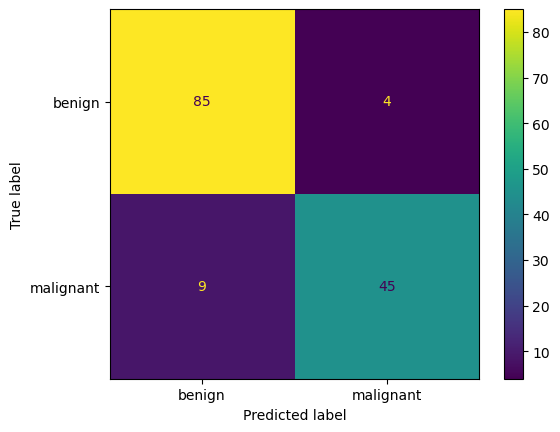

In [26]:

y_pred_prob_two_features = log_reg_model_mean_radius.predict_proba(X_test_mean_radius)[:, 1]
threshold_two_features  = 0.5
y_pred_adjusted_two_features= (y_pred_prob_two_features >= threshold_two_features).astype(int)


conf_matrix = confusion_matrix(y_test_encoded, y_pred_adjusted_two_features)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["benign", "malignant"])
ax = disp.plot()

# Compute performance metrics
accuracy_two_features = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
precision_two_features = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall_two_features = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score_two_features= 2 * (precision_two_features * recall_two_features) / (precision_two_features + recall_two_features)

# Display performance metrics
print("Accuracy:", accuracy_two_features)
print("Precision:", precision_two_features)
print("Recall:", recall_two_features)
print("F1-score:", f1_score_two_features)


## Comparison of the two models
### <font color=red>13. Plot and compare the ROC curves of the two previous models.</font> 
Note: the curves should appear on the same graph with different colors in order to facilitate comparison.

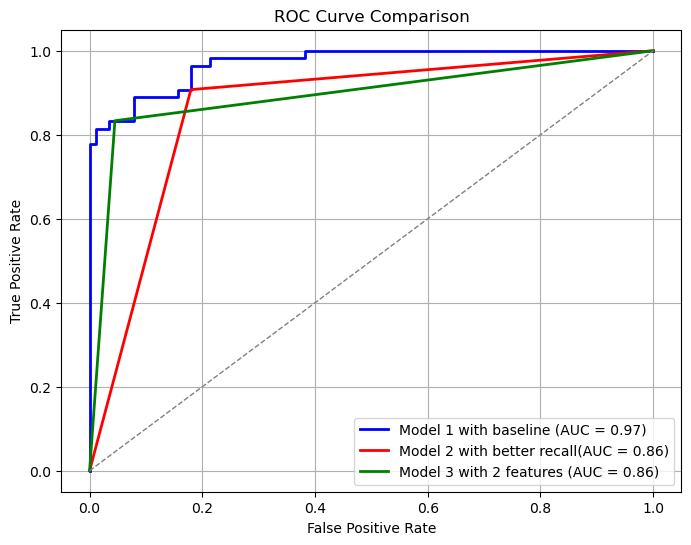

In [27]:

y_pred_prob_model1 = log_reg_model_mean_radius.predict_proba(X_test_mean_radius)[:, 1]
y_pred_prob_lower_threshold = (log_reg_model_mean_radius.predict_proba(X_test_mean_radius)[:, 1] >= 0.3).astype(int)
y_pred_adjusted_two_features= (y_pred_prob_two_features >= threshold_two_features).astype(int)


fpr_model1, tpr_model1, _ = roc_curve(y_test_encoded, y_pred_prob_model1)
roc_auc_model1 = roc_auc_score(y_test_encoded, y_pred_prob_model1)
fpr_model2, tpr_model2, _ = roc_curve(y_test_encoded, y_pred_prob_lower_threshold)
roc_auc_model2 = roc_auc_score(y_test_encoded, y_pred_prob_lower_threshold)
fpr_model3, tpr_model3, _ = roc_curve(y_test_encoded, y_pred_adjusted_two_features)
roc_auc_model3 = roc_auc_score(y_test_encoded, y_pred_adjusted_two_features)

plt.figure(figsize=(8, 6))
plt.plot(fpr_model1, tpr_model1, color='blue', lw=2, label='Model 1 with baseline (AUC = %0.2f)' % roc_auc_model1)
plt.plot(fpr_model2, tpr_model2, color='red', lw=2, label='Model 2 with better recall(AUC = %0.2f)' % roc_auc_model2)
plt.plot(fpr_model3, tpr_model3, color='green', lw=2, label='Model 3 with 2 features (AUC = %0.2f)' % roc_auc_model2)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

📝 Comment


Three logistic regression models were evaluated for predicting breast cancer malignancy. The first, using only "mean radius," achieved an AUC of 0.97, indicating strong performance. The second model, adjusted for better recall, scored slightly lower at 0.86. The third, incorporating two features, also achieved an AUC of 0.86. This suggests that while adding features may not enhance performance significantly, adjusting thresholds can impact specific goals like recall. Model selection should align with specific application needs.

### <font color=red>14. Compute and compare the logistic loss for the two previous models.</font> 

In [28]:


# Compute logistic loss for the first model
log_loss_model1 = log_loss(y_test_encoded, y_pred_prob_model1)

# Compute logistic loss for the second model
log_loss_model2 = log_loss(y_test_encoded, y_pred_prob_lower_threshold)

# Compute logistic loss for the third model
log_loss_model3 = log_loss(y_test_encoded, y_pred_adjusted_two_features)

# Print the logistic loss for each model
print("Logistic Loss for Model 1:", log_loss_model1)
print("Logistic Loss for Model 2:", log_loss_model2)
print("Logistic Loss for Model 3:", log_loss_model3)


Logistic Loss for Model 1: 0.2281220744183213
Logistic Loss for Model 2: 5.293123924275946
Logistic Loss for Model 3: 3.2766957626470137


📝 Comment

Lower values indicate better performance, as they reflect a closer match between the predicted probabilities and the actual outcomes. In this case, Model 1 has the lowest logistic loss, indicating the best performance, while Model 2 and Model 3 have higher losses, suggesting lower performance.